# Datasets

## load_diabetes (당뇨병)

https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_diabetes.html#sklearn.datasets.load_diabetes

In [1]:
from sklearn.datasets import load_diabetes

In [2]:
dataset = load_diabetes()
type(dataset.data), type(dataset.target)

(numpy.ndarray, numpy.ndarray)

In [3]:
dataset.data.shape, dataset.target.shape

((442, 10), (442,))

In [4]:
print(dataset.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

## kc_house_data

https://www.kaggle.com/datasets/harlfoxem/housesalesprediction

This dataset contains house sale prices for King County, which includes Seattle. It includes homes sold between May 2014 and May 2015.


In [5]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/Shreyas3108/house-price-prediction/master/kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [6]:
df.shape

(21613, 21)

In [7]:
df.to_numpy().shape

(21613, 21)

# Univariate Linear Regression

Implement the UnivariateLinearRegression class in Python, which models a linear relationship between a single independent variable and a dependent variable using the least squares method. Test your implementation with a real dataset.

In [8]:
import numpy as np

class UnivariateLinearRegression:
  def __init__(self):
    self.w0 = 0
    self.w1 = 0

  def fit(self, X, y):
    # Please refer to page 4 of the lecture (AIP_10_Linear Regression and k-NN (A)).
    pass

  def predict(self, X):
    return self.w0 + self.w1 * X


In [9]:
from sklearn import datasets
from sklearn.model_selection import train_test_split

diabetes = datasets.load_diabetes()
X_train, X_test, y_train, y_test = train_test_split(diabetes.data, diabetes.target)
X_train_uni, X_test_uni = X_train[:, 2], X_test[:, 2]

uni_regression = UnivariateLinearRegression()
uni_regression.fit(X_train_uni, y_train)
y_pred = uni_regression.predict(X_test_uni)

print('Coefficients: \n', uni_regression.w1)
print('Intercept: \n', uni_regression.w0)
print('Mean squared error: %.2f' % np.mean((y_pred - y_test) ** 2))

Coefficients: 
 0
Intercept: 
 0
Mean squared error: 30106.25


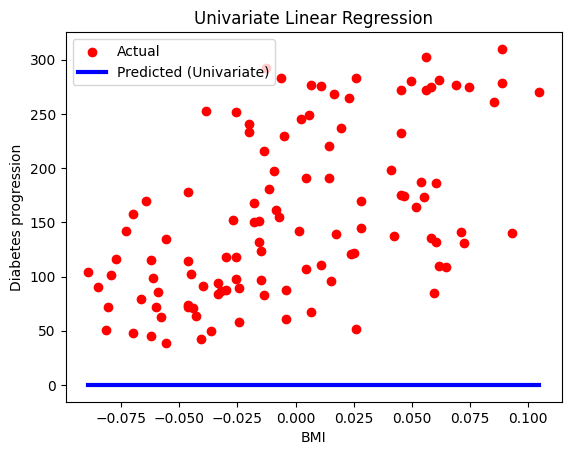

In [10]:
import matplotlib.pyplot as plt

plt.scatter(X_test_uni, y_test, color='red', label='Actual')
sorted_idx = np.argsort(X_test_uni)
plt.plot(X_test_uni[sorted_idx], y_pred[sorted_idx], color='blue', linewidth=3, label='Predicted (Univariate)')
plt.xlabel('BMI')
plt.ylabel('Diabetes progression') # 1년 후 질병 진행의 정량적 측정
plt.title('Univariate Linear Regression')
plt.legend()
plt.show()

# Multivariate Linear Regression

Your task is to implement the MultivariateLinearRegression class in Python, which performs linear regression with multiple independent variables. After implementing the class, you will test its functionality using a real-world dataset.

## Analytical Solution

$$ w^* = (X^T X)^{-1} X^T y $$

In [2]:
import numpy as np
from numpy.linalg import inv

class MultivariateLinearRegression:
  def __init__(self):
    self.weights = None

  def fit(self, X, y):
    # Please refer to page 5 of the lecture (AIP_10_Linear Regression and k-NN (A)).
    print(X.shape, y.shape)
    self.weights = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
    pass

  def predict(self, X):
    return X.dot(self.weights)

ModuleNotFoundError: No module named 'numpy'

In [12]:
regression = MultivariateLinearRegression()
regression.fit(X_train, y_train)
y_pred = regression.predict(X_test)

print('Weights: \n', regression.weights)
print('Mean squared error: %.2f' % np.mean((y_pred - y_test) ** 2))

(331, 10) (331,)
Weights: 
 [ -50.64347703 -227.06395037  641.67060092  150.50224677 -952.80992164
  559.87493145  218.32398719  369.21463533  785.43325718    3.92702685]
Mean squared error: 27810.24


## Gradient Descent

Implement the MultivariateLinearRegressionWithGradientDescent class to perform linear regression on datasets with multiple features. Your implementation should utilize the gradient descent algorithm to optimize the model's weights.

The cost function J for MSE can be written as:

$$ J(w, b) = \frac{1}{m} \sum_{i=1}^{m} (\hat{y}^{(i)} - y^{(i)})^2 $$

$$ J(w, b) = \frac{1}{m} \sum_{i=1}^{m} (w \cdot x^{(i)} + b - y^{(i)})^2 $$

The gradient of the cost function with respect to weight w<sub>j</sub> is:

$$ \frac{\partial J}{\partial w_j} = \frac{2}{m} \sum_{i=1}^{m} ((w \cdot x^{(i)} + b) - y^{(i)}) x_j^{(i)} $$

$$ \frac{\partial J}{\partial b} = \frac{2}{m} \sum_{i=1}^{m} ((w \cdot x^{(i)} + b) - y^{(i)}) $$

In [13]:
class MultivariateLinearRegressionWithGradientDescent:
  def __init__(self, learning_rate=0.5, iterations=1000):
    self.learning_rate = learning_rate
    self.iterations = iterations
    self.weights = None
    self.bias = None

  def fit(self, X, y):
    m, n = X.shape
    self.weights = np.zeros(n)
    self.bias = 0

    for _ in range(self.iterations):
      y_pred = self.predict(X)
      # print(type(X))
      # print(self.weights.shape, self.bias.shape, X.shape, y.shape)
      # dw = ((X.dot(self.weights) + self.bias - y)).mean() * 2
      # db = (X.dot(self.weights) + self.bias - y).mean() * 2

      # m = len(y)
      h = np.dot(X, self.weights) + self.bias
      error = h - y
      dw = (2/m) * np.dot(X.T, error)
      db = (2/m) * np.sum(error)
      # X.T @ (X @ self.weights + self.bias - y).mean() * 2
      # (X @ self.weights + self.bias).mean() * 2
      # print(X.T.shape, X.shape, self.weights.shape, y.shape)
      # dw = X.T @ (X @ self.weights + self.bias - y) / m * 2
      # db = (X @ self.weights + self.bias) / m * 2
      self.weights -= dw * self.learning_rate
      self.bias -= db * self.learning_rate

  def predict(self, X):
    return np.dot(X, self.weights) + self.bias

In [14]:
regression = MultivariateLinearRegressionWithGradientDescent()
regression.fit(X_train, y_train)
y_pred = regression.predict(X_test)

print('Weights: \n', regression.weights)
print('Bias: \n', regression.bias)
print('Mean squared error: %.2f' % np.mean((y_pred - y_test) ** 2))

Weights: 
 [ -27.44975153 -206.28512748  512.03121612  274.13716893  -61.77462504
 -110.21117154 -242.46173036  149.27633532  388.3407238   138.40214523]
Bias: 
 151.07353878278974
Mean squared error: 3110.76


In [15]:
X_train_mul, X_test_mul = X_train[:, [0, 2]], X_test[:, [0, 2]]
regression = MultivariateLinearRegressionWithGradientDescent()
regression.fit(X_train_mul, y_train)
y_pred = regression.predict(X_test_mul)

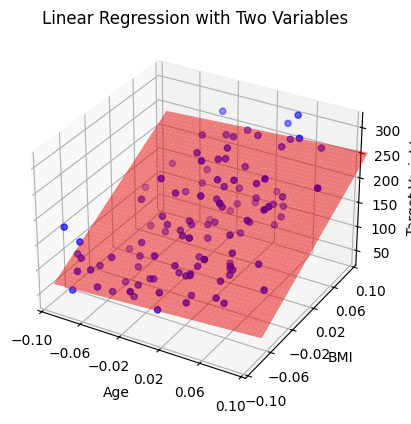

In [16]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import LinearLocator

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_test_mul[:, 0], X_test_mul[:, 1], y_test, color='b')

x1_range = np.linspace(X_test_mul[:, 0].min(), X_test_mul[:, 0].max(), 100)
x2_range = np.linspace(X_test_mul[:, 1].min(), X_test_mul[:, 1].max(), 100)

x1, x2 = np.meshgrid(x1_range, x2_range)
y_pred = regression.bias + regression.weights[0]*x1 + regression.weights[1]*x2
ax.plot_surface(x1, x2, y_pred, color='r', alpha=0.5)

ax.set_xlabel('Age')
ax.set_xlim((-0.1, 0.1))
ax.xaxis.set_major_locator(LinearLocator(6))
ax.set_ylabel('BMI')
ax.set_ylim((-0.1, 0.1))
ax.yaxis.set_major_locator(LinearLocator(6))
ax.set_zlabel('Target Variable')
plt.title('Linear Regression with Two Variables')

plt.show()